# Chapter 01 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

# Coin toss experiment

In [2]:
import random
from collections import Counter

# set random seed for reproducibility (you can use any number)
random.seed(123)

coin = ["H", "T"]

# one trial: simulate 10 coin tosses and count number of heads and tails
trial = random.choices(coin, k=10)
counts = Counter(trial)
print(counts)

# keep track of numbers of heads
nr_heads = [counts["H"]]

Counter({'H': 7, 'T': 3})


In [3]:
# repeat trial 11 more times
for _ in range(11):
    trial = random.choices(coin, k=10)
    counts = Counter(trial)
    print(counts)
    nr_heads.append(counts["H"])

Counter({'H': 9, 'T': 1})
Counter({'T': 6, 'H': 4})
Counter({'T': 6, 'H': 4})
Counter({'T': 6, 'H': 4})
Counter({'H': 6, 'T': 4})
Counter({'H': 5, 'T': 5})
Counter({'T': 5, 'H': 5})
Counter({'H': 10})
Counter({'H': 7, 'T': 3})
Counter({'T': 6, 'H': 4})
Counter({'T': 6, 'H': 4})


In [4]:
# repeat trial 100 more times
for _ in range(100):
    trial = random.choices(coin, k=10)
    counts = Counter(trial)
    nr_heads.append(counts["H"])
seven_or_more = sum(n >= 7 for n in nr_heads)
print(f"Seven or more heads occurred in {seven_or_more} trials")

Seven or more heads occurred in 24 trials


# Proportion of heads as a function of coin tosses

In [5]:
import pandas as pd
nr_of_tosses = 0
nr_of_heads = 0
results = []
for increment in [10, 100, 1000]:
    for _ in range(10 if increment == 10 else 9):
        tosses = random.choices(coin, k=increment)
        nr_of_tosses += len(tosses)
        nr_of_heads += sum(toss == "H" for toss in tosses)
        results.append({"tosses": nr_of_tosses, "heads": nr_of_heads})
df = pd.DataFrame(results)
df["proportion"] = df["heads"] / df["tosses"]
df

,tosses,heads,proportion
0,10,5,0.500000
1,20,8,0.400000
2,30,14,0.466667
3,40,17,0.425000
4,50,21,0.420000
5,60,26,0.433333
6,70,31,0.442857
7,80,37,0.462500
8,90,43,0.477778
9,100,47,0.470000


 Visualize the results

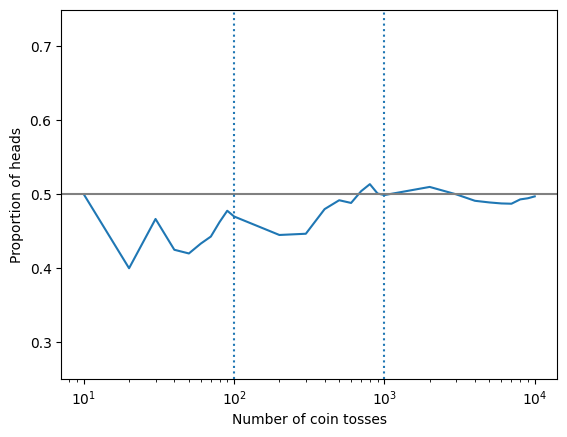

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x="tosses", y="proportion", legend=False, ax=ax)
ax.set_xscale("log")
ax.set_ylim(0.25, 0.75)
ax.axhline(0.5, color="grey")
ax.axvline(100, linestyle=":")
ax.axvline(1000, linestyle=":")
ax.set_xlabel("Number of coin tosses")
ax.set_ylabel("Proportion of heads")
plt.show()

# Example: Hospital error reduction

 Load the data

In [7]:
data = pd.read_csv("hospitalerrors.csv")
data.head()

,Control,Treatment
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


## Central location

 Calculate the mean

In [8]:
data.mean()

Control      1.88
Treatment    2.80
dtype: float64

 Calculate the median

In [9]:
data.median()

Control      2.0
Treatment    2.0
dtype: float64

## Variation

 Calculate the range

In [10]:
data.max() - data.min()

Control      4
Treatment    7
dtype: int64

 Calculate percentiles

In [11]:
data.quantile([0.25, 0.5, 0.75])

,Control,Treatment
0.25,1.0,2.0
0.50,2.0,2.0
0.75,2.0,3.0


 Calculate the interquartile range

In [12]:
data.quantile(0.75) - data.quantile(0.25)

Control      1.0
Treatment    1.0
dtype: float64

 Calculate the mean absolute deviation

In [13]:
data.mad()

Control      0.8448
Treatment    1.1520
dtype: float64

 Calculate the variance

In [14]:
data.var()

Control      1.276667
Treatment    2.833333
dtype: float64

 Calculate the population variance; divide by $N-1$

In [15]:
data.var(ddof=0)

Control      1.2256
Treatment    2.7200
dtype: float64

# Example: Musical genre preferences

 Create a data frame with the data

In [16]:
data = pd.DataFrame({
    "Rock": [7, 4, 9],
    "Hip-Hop": [1, 9, 1],
    "Country": [9, 1, 7],
    "Jazz": [1, 3, 2],
    "New Age": [3, 1, 2],
}, index=["A", "B", "C"])
data

,Rock,Hip-Hop,Country,Jazz,New Age
A,7,1,9,1,3
B,4,9,1,3,1
C,9,1,7,2,2


 Calculate the Euclidean distance between A and C

In [17]:
import numpy as np
np.sqrt(np.sum((data.loc["A"] - data.loc["C"])**2))

3.1622776601683795

 and between B and C

In [18]:
np.sqrt(np.sum((data.loc["B"] - data.loc["C"])**2))

11.269427669584644

 The distance between A and C is less than the distance between B and C, so A and C are more similar.

# Example: Reduction in major errors in hospitals} 

In [19]:
data = pd.read_csv("hospitalerrors_2.csv")

 Calculate the mean reduction in errors for the treatment and control groups

In [20]:
mean_reduction = data.groupby("Treatment")["Reduction"].mean()
mean_reduction

Treatment
0    1.88
1    2.80
Name: Reduction, dtype: float64

 The difference between the two means is the test statistic

In [21]:
print(f"Difference between the two means: {mean_reduction[1] - mean_reduction[0]:.2f}")

Difference between the two means: 0.92


## Frequency tables

In [22]:
counts = data.groupby("Treatment")["Reduction"].value_counts()
frequency = pd.DataFrame({
    "Control": counts.loc[0],
    "Treatment": counts.loc[1],
}).fillna(0)
frequency["Total"] = frequency["Control"] + frequency["Treatment"]
frequency.loc["All"] = frequency.sum()
frequency

,Control,Treatment,Total
Reduction,,,
1,12.0,0.0,12.0
2,8.0,18.0,26.0
3,2.0,2.0,4.0
4,2.0,2.0,4.0
5,1.0,1.0,2.0
6,0.0,1.0,1.0
9,0.0,1.0,1.0
All,25.0,25.0,50.0


## Cumulative frequency table

In [23]:
cum_frequency = pd.DataFrame({
    "Frequency": frequency.loc[1:9, "Control"],
})
cum_frequency["Cumulative Frequency"] = cum_frequency["Frequency"].cumsum()
cum_frequency["Relative Frequency"] = cum_frequency["Frequency"] / cum_frequency["Frequency"].sum()
cum_frequency

,Frequency,Cumulative Frequency,Relative Frequency
Reduction,,,
1,12.0,12.0,0.48
2,8.0,20.0,0.32
3,2.0,22.0,0.08
4,2.0,24.0,0.08
5,1.0,25.0,0.04
6,0.0,25.0,0.00
9,0.0,25.0,0.00


# Data Visualization

## Histogram

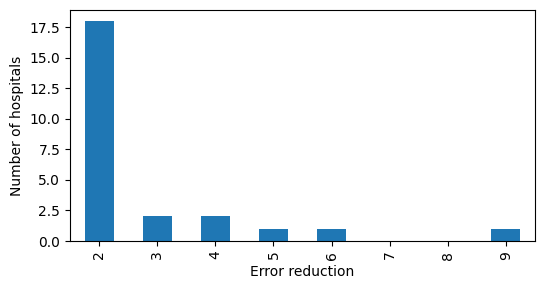

In [24]:
# determine counts data
counts = data[data["Treatment"] == 1]["Reduction"].value_counts()
# add zero values for error reductions of 7 and 8
counts.loc[7] = 0
counts.loc[8] = 0
counts = counts.sort_index()

fig, ax = plt.subplots(figsize=(6, 3))
counts.plot.bar(ax=ax)
ax.set_xlabel("Error reduction")
ax.set_ylabel("Number of hospitals")
plt.show()

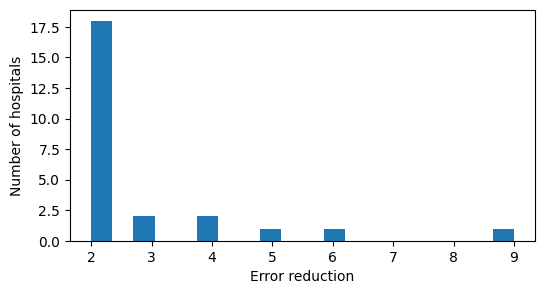

In [25]:
fig, ax = plt.subplots(figsize=(6, 3))
data[data["Treatment"] == 1]["Reduction"].plot.hist(bins=20, ax=ax)
ax.set_xlabel("Error reduction")
ax.set_ylabel("Number of hospitals")
plt.show()

## Boxplots

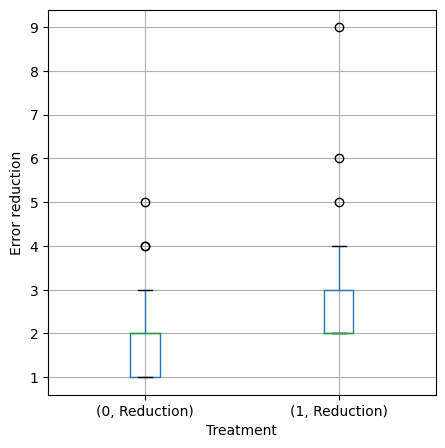

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
data.groupby("Treatment").boxplot(subplots=False, column="Reduction", ax=ax)
ax.set_xlabel("Treatment")
ax.set_ylabel("Error reduction")
plt.show()

 a. Prepare the dataset and count the number of `H` in each run

In [27]:
runs = [
    'HHHTTHTTHH', 'TTHHHTTTHH', 'TTHHTHHTTT', 'HTTHTHHTTT', 'HTHTHTHTTT',
    'TTHTTTTHHH', 'HHHTHTHHHH', 'HHTHHHTTTH', 'HHTTTTHTTT', 'THHTTTHTTH',
    'TTHHHTTHHT', 'TTTHHHHTHT', 'TTHTHTTTTT', 'THTHHHTTTT', 'THTHHHTTTT',
    'HHTTHTHHHH', 'HTTHTHTHTH', 'THHTHHHHHT', 'THHHTTHTTT', 'THTHHHTHTH'
]
counts = [run.count('H') for run in runs]

 b. Prepare the frequency table

In [28]:
freq_table = pd.Series(counts).value_counts().sort_index()
freq_table.index.name = 'Number of H'
freq_table.name = 'Frequency'
freq_table

Number of H
2    1
3    1
4    8
5    4
6    3
7    2
8    1
Name: Frequency, dtype: int64

 c.

In [29]:
# solution 1
print(f'{sum(count > 7 for count in counts) / len(counts):.3f}')
# solution 2
print(f'{freq_table[7:].sum() / freq_table.sum():.3f}')

0.050
0.000


 d. 